In [1]:
# import glob
# [_.split('/')[-1] for _ in glob.glob('../*.txt')]

In [2]:
import glob
import pandas as pd
import pickle
import sys
import os
dir_path = '/'.join(os.path.realpath('.').split('/')[:-1])
sys.path.append(f'{dir_path}/sabatinilab-glm/backend')
sys.path.append(f'{dir_path}/..')
sys.path.append(f'{dir_path}/backend')
sys.path.append(f'{dir_path}/../backend')

import sglm
import sglm_cv
import sglm_pp
import sglm_ez
import sglm_plt as splt
import sglm_save as ssave
import lynne_pp as lpp
from tqdm import tqdm, trange


In [3]:
# prefix = 'new_lynne_linear_only_refac'
# prefix = 'new_lynne_minl2_only_refac'
# prefix = 'investig_resolved'
# prefix = 'r_trial-r-refit'
# prefix = 'r_concat2'
# prefix = 'allsess_fit_multi_alpha'
# prefix = 'manysess_individ-nohyp'
prefix = 'diff_tbnds_manysess_individ'
gdat_dct = {}

for fn in sorted(glob.glob(f'../../model_outputs/ssave/{prefix}*.pkl')):
    gdat_dct[fn] = pickle.load(open(fn, 'rb'))

In [4]:
# gdat_lst[0].data.keys()

In [5]:
# bd = gdat_lst[0].data['basedata']
# # bd['wi_trial_keep']
# # bd

In [6]:
# bd[bd['wi_trial_keep']]

In [7]:
# gdat.data.keys()

In [8]:
# gdat_lst[0].data['X_cols']

In [9]:
col_names = ['fn', 'response', 'dropped', 'alpha', 'l1_ratio', 'tr_witi', 'tr_noiti', 'gss_witi', 'gss_noiti', 'holdout_witi', 'holdout_noiti']
df = pd.DataFrame(columns=col_names)

for gdat_key in gdat_dct:
    gdat = gdat_dct[gdat_key]
    for fr in gdat.data['fit_results']:
        print(fr.keys())
        dc = fr['dropped_cols']
        rc = fr['response_col']
        hp = fr['hyperparams']
        scores = fr['scores']
        # print(fr.keys())
        print('response_col:', rc, '— dropped_cols', dc, '— hyperparams', hp)
        for sc in scores:
            if scores[sc] is not None:
                print('>', sc, scores[sc])
        
        df = df.append(pd.DataFrame([[gdat.data['filename'], rc, dc, hp['alpha'], hp['l1_ratio'], scores['tr_witi'], scores['tr_noiti'], scores['gss_witi'], scores['gss_noiti'], scores['holdout_witi'], scores['holdout_noiti']]], columns=col_names))

dict_keys(['response_col', 'hyperparams', 'glm_model_gss', 'dropped_cols', 'scores', 'gss_mse', 'refit_mse', 'gssids'])
response_col: Ch1 — dropped_cols [] — hyperparams {'max_iter': 1000, 'fit_intercept': True, 'alpha': 0.0, 'l1_ratio': 0}
> tr_witi 0.07034928207551172
> tr_noiti 0.11711273505683273
> gss_witi 0.05367670157292659
> holdout_witi 0.050936303470884736
> holdout_noiti 0.09776151871370853
dict_keys(['response_col', 'hyperparams', 'glm_model_gss', 'dropped_cols', 'scores', 'gss_mse', 'refit_mse', 'gssids'])
response_col: Ch2 — dropped_cols [] — hyperparams {'max_iter': 1000, 'fit_intercept': True, 'alpha': 0.0, 'l1_ratio': 0}
> tr_witi 0.14108822923610098
> tr_noiti 0.2706583390421854
> gss_witi 0.12497374362904679
> holdout_witi 0.11475040872656139
> holdout_noiti 0.19332028228745057
dict_keys(['response_col', 'hyperparams', 'glm_model_gss', 'dropped_cols', 'scores', 'gss_mse', 'refit_mse', 'gssids'])
response_col: Ch5 — dropped_cols [] — hyperparams {'max_iter': 1000, 'fi

In [10]:
with pd.option_context('max_rows',1000):
    # display(df.sort_values(['fn', 'holdout_noiti'], ascending=False))
    display(df.sort_values(['response', 'fn'], ascending=[True, True]).set_index(['response', 'fn']))
    # display(df.sort_values(['response', 'holdout_noiti'], ascending=False))


dropped  alpha l1_ratio   tr_witi  \
response fn                                                                
Ch1      GLM_SIGNALS_WT43_03192021.txt      []    0.0        0  0.070349   
         GLM_SIGNALS_WT43_03232021.txt      []    0.0        0  0.064912   
         GLM_SIGNALS_WT43_03262021.txt      []    0.0        0  0.066623   
         GLM_SIGNALS_WT44_03162021.txt      []    0.0        0  0.064592   
         GLM_SIGNALS_WT44_03192021.txt      []    0.0        0  0.064874   
         GLM_SIGNALS_WT44_03232021.txt      []    0.0        0  0.073519   
         GLM_SIGNALS_WT44_03262021.txt      []    0.0        0  0.076474   
         GLM_SIGNALS_WT61_10042021.txt      []    0.0        0  0.284199   
         GLM_SIGNALS_WT61_10062021.txt      []    0.0        0  0.302882   
         GLM_SIGNALS_WT61_10082021.txt      []    0.0        0  0.287943   
         GLM_SIGNALS_WT61_10112021.txt      []    0.0        0  0.315573   
         GLM_SIGNALS_WT61_10132021.txt      []    0.0        0  0.309459   
         GLM_SIGNALS_WT61_10152021.txt      []    0.0        0  0.284131   
         GLM_SIGNALS_WT61_10182021.txt      []    0.0        0  0.314313   
         GLM_SIGNALS_WT63_11082021.txt      []    0.0        0  0.238932   
         GLM_SIGNALS_WT63_11102021.txt      []    0.0        0  0.307077   
         GLM_SIGNALS_WT63_11122021.txt      []    0.0        0  0.319521   
         GLM_SIGNALS_WT63_11162021.txt      []    0.0        0  0.270583   
         GLM_SIGNALS_WT63_11182021.txt      []    0.0        0  0.310137   
         GLM_SIGNALS_WT63_11222021.txt      []    0.0        0  0.237751   
         GLM_SIGNALS_WT64_11082021.txt      []    0.0        0  0.247169   
         GLM_SIGNALS_WT64_11102021.txt      []    0.0        0  0.213210   
         GLM_SIGNALS_WT64_11122021.txt      []    0.0        0  0.193074   
         GLM_SIGNALS_WT64_11162021.txt      []    0.0        0  0.227402   
         GLM_SIGNALS_WT64_11182021.txt      []    0.0        0  0.215625   
         GLM_SIGNALS_WT64_11222021.txt      []    0.0        0  0.194386   
Ch2      GLM_SIGNALS_WT43_03192021.txt      []    0.0        0  0.141088   
         GLM_SIGNALS_WT43_03232021.txt      []    0.0        0  0.141604   
         GLM_SIGNALS_WT43_03262021.txt      []    0.0        0  0.117364   
         GLM_SIGNALS_WT44_03162021.txt      []    0.0        0  0.214316   
         GLM_SIGNALS_WT44_03192021.txt      []    0.0        0  0.214494   
         GLM_SIGNALS_WT44_03232021.txt      []    0.0        0  0.206275   
         GLM_SIGNALS_WT44_03262021.txt      []    0.0        0  0.200461   
         GLM_SIGNALS_WT61_10042021.txt      []    0.0        0  0.167356   
         GLM_SIGNALS_WT61_10062021.txt      []    0.0        0  0.138053   
         GLM_SIGNALS_WT61_10082021.txt      []    0.0        0  0.010687   
         GLM_SIGNALS_WT61_10112021.txt      []    0.0        0  0.125067   
         GLM_SIGNALS_WT61_10132021.txt      []    0.0        0  0.157404   
         GLM_SIGNALS_WT61_10152021.txt      []    0.0        0  0.023992   
         GLM_SIGNALS_WT61_10182021.txt      []    0.0        0  0.056253   
         GLM_SIGNALS_WT63_11082021.txt      []    0.0        0  0.009530   
         GLM_SIGNALS_WT63_11102021.txt      []    0.0        0  0.008344   
         GLM_SIGNALS_WT63_11122021.txt      []    0.0        0  0.011980   
         GLM_SIGNALS_WT63_11162021.txt      []    0.0        0  0.027694   
         GLM_SIGNALS_WT63_11182021.txt      []    0.0        0  0.006781   
         GLM_SIGNALS_WT63_11222021.txt      []    0.0        0  0.006517   
         GLM_SIGNALS_WT64_11082021.txt      []    0.0        0  0.012220   
         GLM_SIGNALS_WT64_11102021.txt      []    0.0        0  0.014132   
         GLM_SIGNALS_WT64_11122021.txt      []    0.0        0  0.038792   
         GLM_SIGNALS_WT64_11162021.txt      []    0.0        0  0.032560   
         GLM_SIGNALS_WT64_11182021.txt      []    0.0        0  0.011454   
         GL

In [11]:
# # df['delta'] = df['holdout_witi'] - df['gss_witi']
# df['delta'] = df['holdout_witi'].apply(lambda x: x) - df['tr_witi']
# df = df[~df['dropped'].astype(str).str.contains('nTrial')]

# with pd.option_context('max_rows', 10000):
#     # display(df.sort_values(['response', 'alpha', 'l1_ratio', 'delta'], ascending=[True, True, True, False]))
#     display(df.assign(dropped=df['dropped'].astype(str)).set_index(['fn', 'response', 'alpha', 'l1_ratio', 'dropped'])['delta'].unstack(-1).sort_index())


In [12]:
import matplotlib.pyplot as plt

fit_res_lst_setup = [[(gdat_key.split('/')[-1], _, gdat_dct[gdat_key]) for _ in gdat_dct[gdat_key].data['fit_results']] for gdat_key in gdat_dct]
fit_res_lst = []
for frls in fit_res_lst_setup:
    fit_res_lst += frls

# [_ for _ in sorted(fit_res_lst, key=lambda x: (x[1]['response_col'], x[0]))]
fit_res_lst = sorted(fit_res_lst, key=lambda x: (x[1]['response_col'], x[0]))

fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT43_03192021.pkl - 0 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT43_03232021.pkl - 1 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT43_03262021.pkl - 2 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT44_03162021.pkl - 3 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT44_03192021.pkl - 4 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT44_03232021.pkl - 5 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT44_03262021.pkl - 6 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10042021.pkl - 7 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10062021.pkl - 8 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10082021.pkl - 9 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10112021.pkl - 10 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10132021.pkl - 11 <class 'dict'>
fn: diff_tbnds_manysess_in

<ipython-input-13-40e039b59906>:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11082021.pkl - 20 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11102021.pkl - 21 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11122021.pkl - 22 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11162021.pkl - 23 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11182021.pkl - 24 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11222021.pkl - 25 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT43_03192021.pkl - 26 <class 'dict'>


<Figure size 432x288 with 0 Axes>

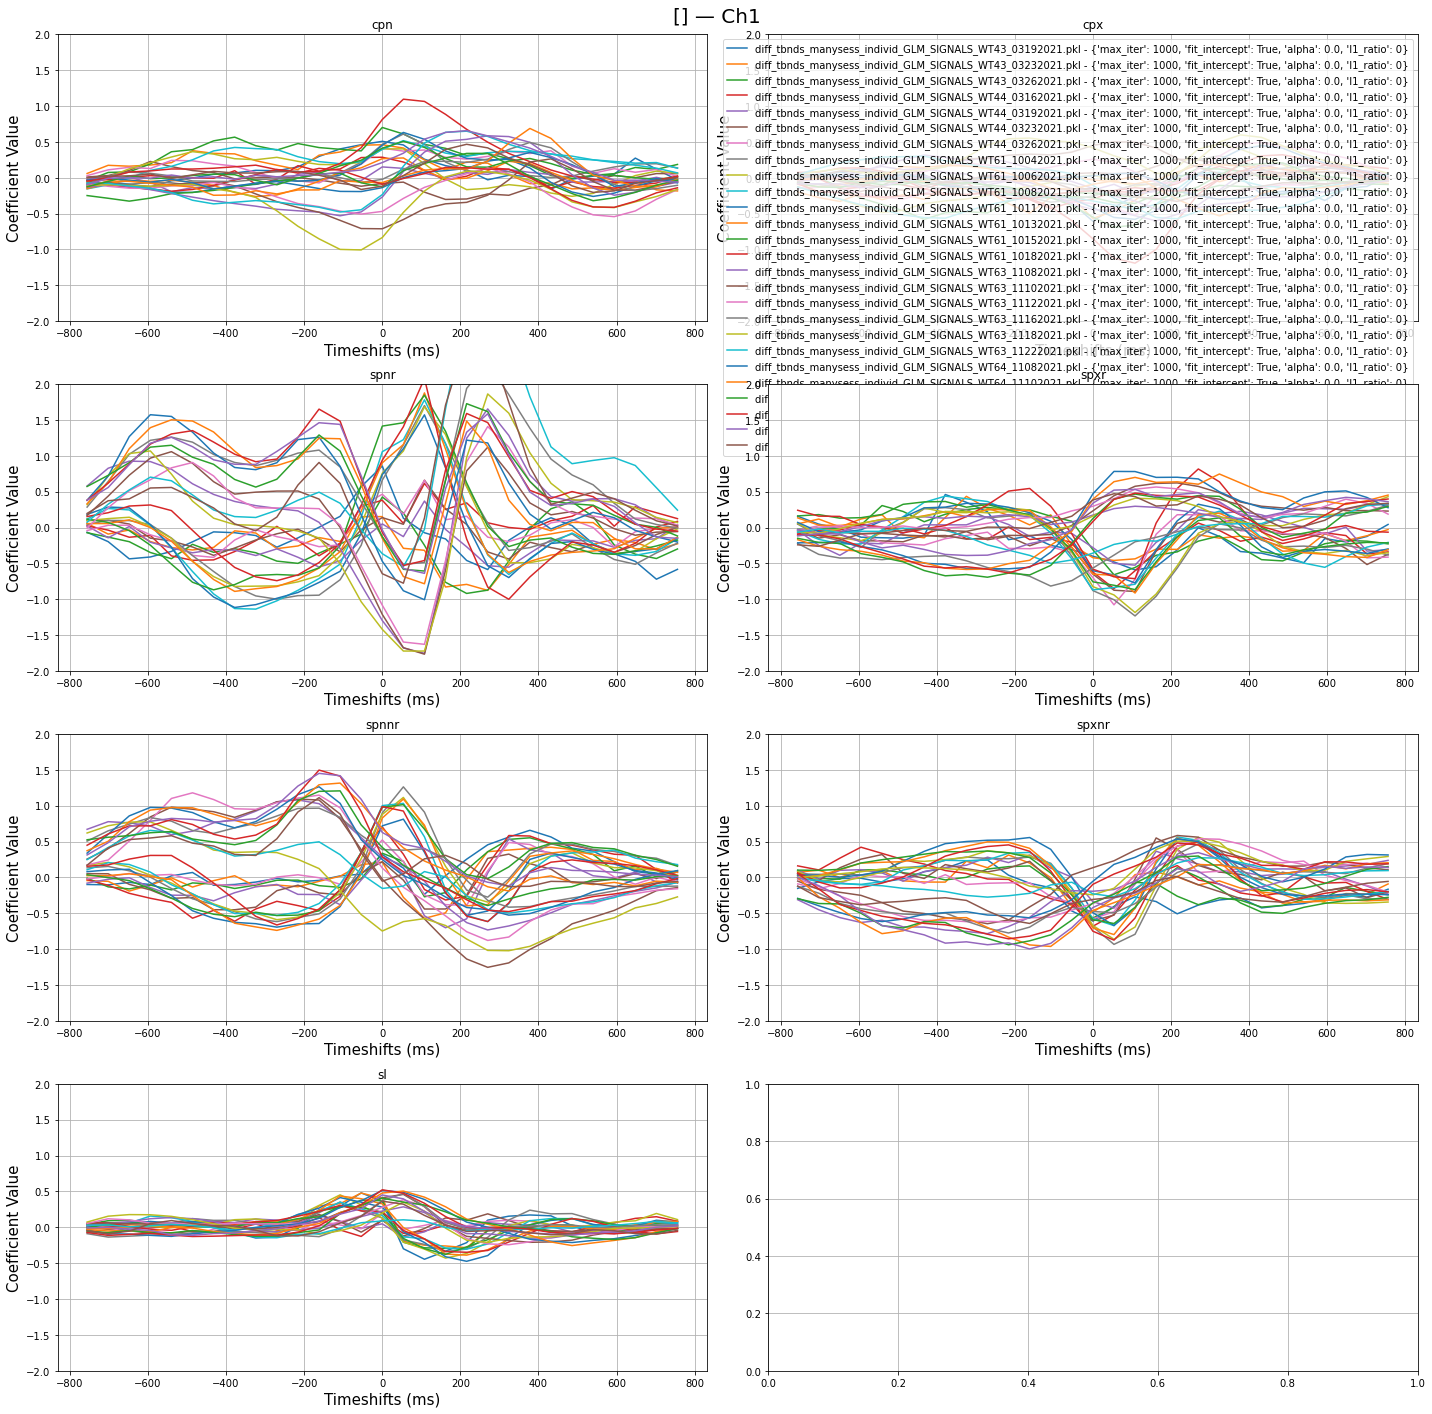

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT43_03232021.pkl - 27 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT43_03262021.pkl - 28 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT44_03162021.pkl - 29 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT44_03192021.pkl - 30 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT44_03232021.pkl - 31 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT44_03262021.pkl - 32 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10042021.pkl - 33 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10062021.pkl - 34 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10082021.pkl - 35 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10112021.pkl - 36 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10132021.pkl - 37 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10152021.pkl - 38 <class 'dict'>
fn: diff_tbnds_m

<ipython-input-13-40e039b59906>:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11102021.pkl - 47 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11122021.pkl - 48 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11162021.pkl - 49 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11182021.pkl - 50 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11222021.pkl - 51 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT43_03192021.pkl - 52 <class 'dict'>


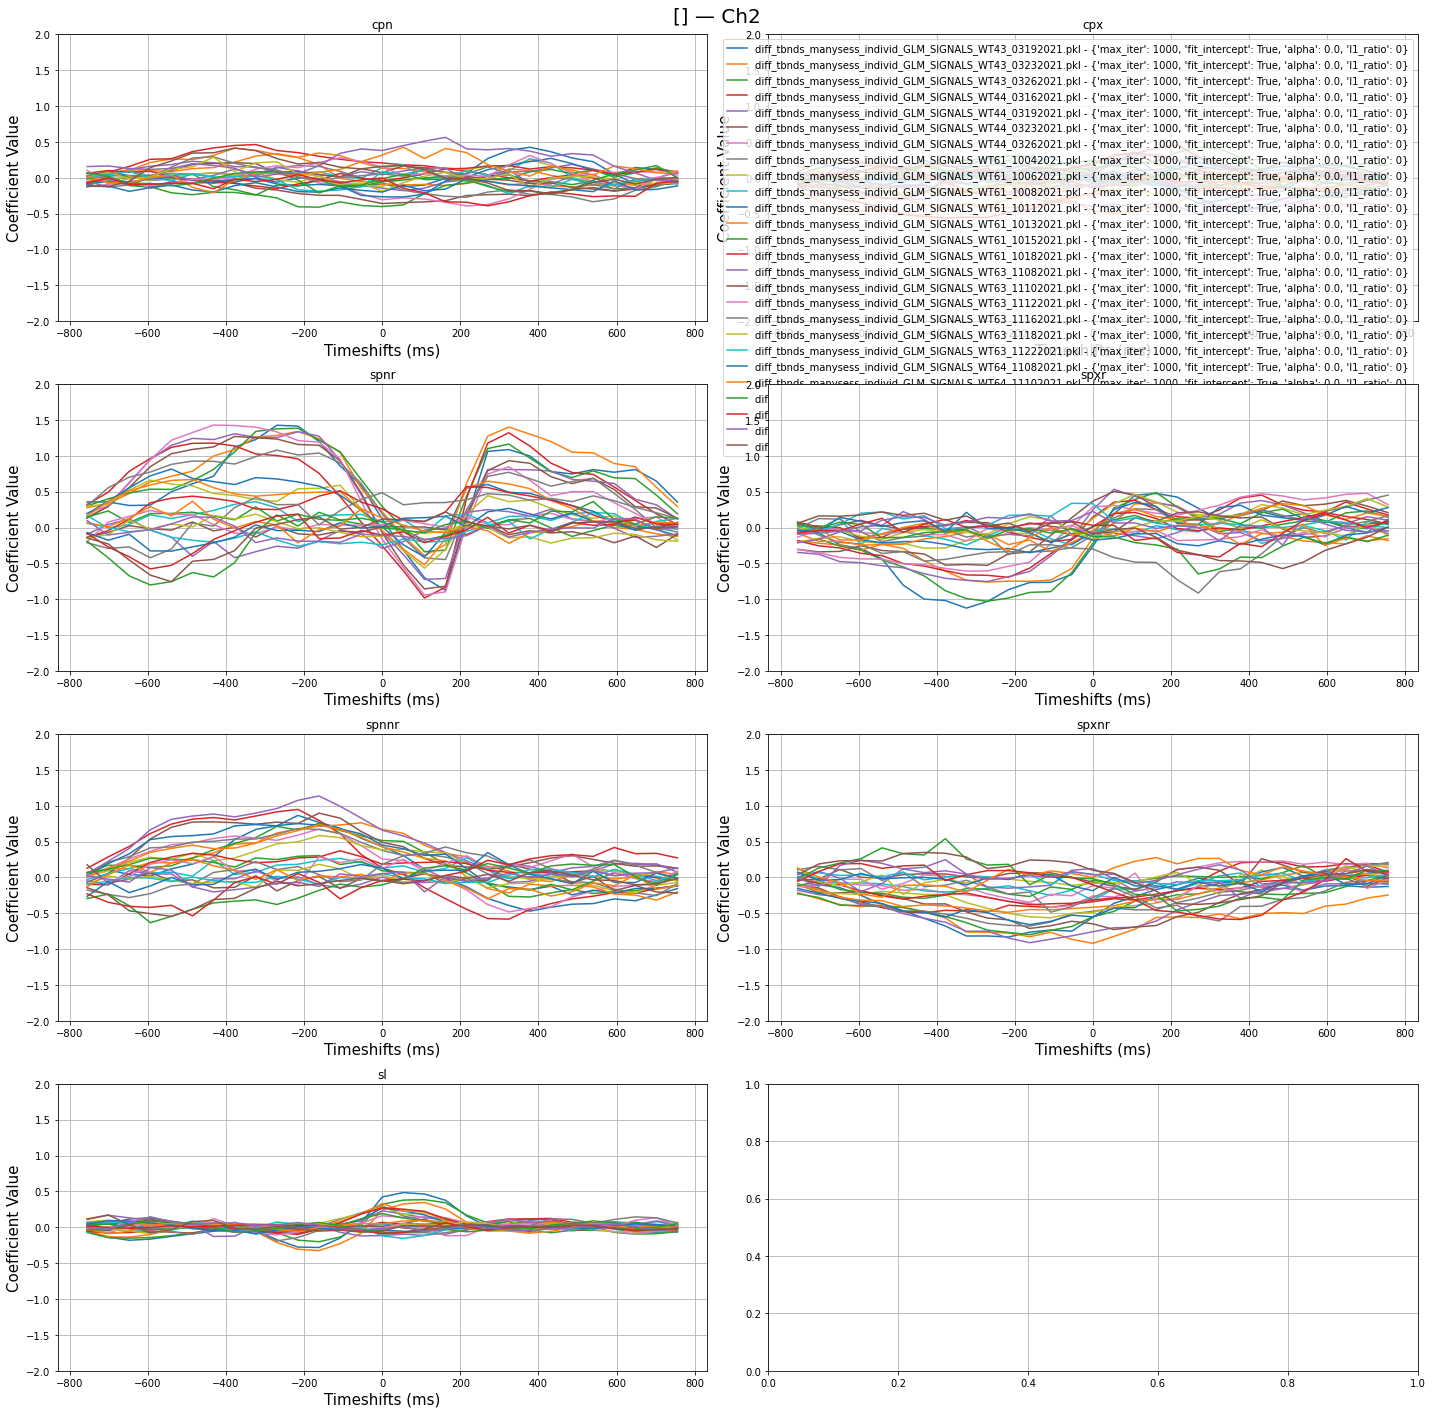

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT43_03232021.pkl - 53 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT43_03262021.pkl - 54 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT44_03162021.pkl - 55 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT44_03192021.pkl - 56 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT44_03232021.pkl - 57 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT44_03262021.pkl - 58 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10042021.pkl - 59 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10062021.pkl - 60 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10082021.pkl - 61 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10112021.pkl - 62 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10132021.pkl - 63 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10152021.pkl - 64 <class 'dict'>
fn: diff_tbnds_m

<ipython-input-13-40e039b59906>:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11122021.pkl - 74 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11162021.pkl - 75 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11182021.pkl - 76 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11222021.pkl - 77 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT43_03192021.pkl - 78 <class 'dict'>


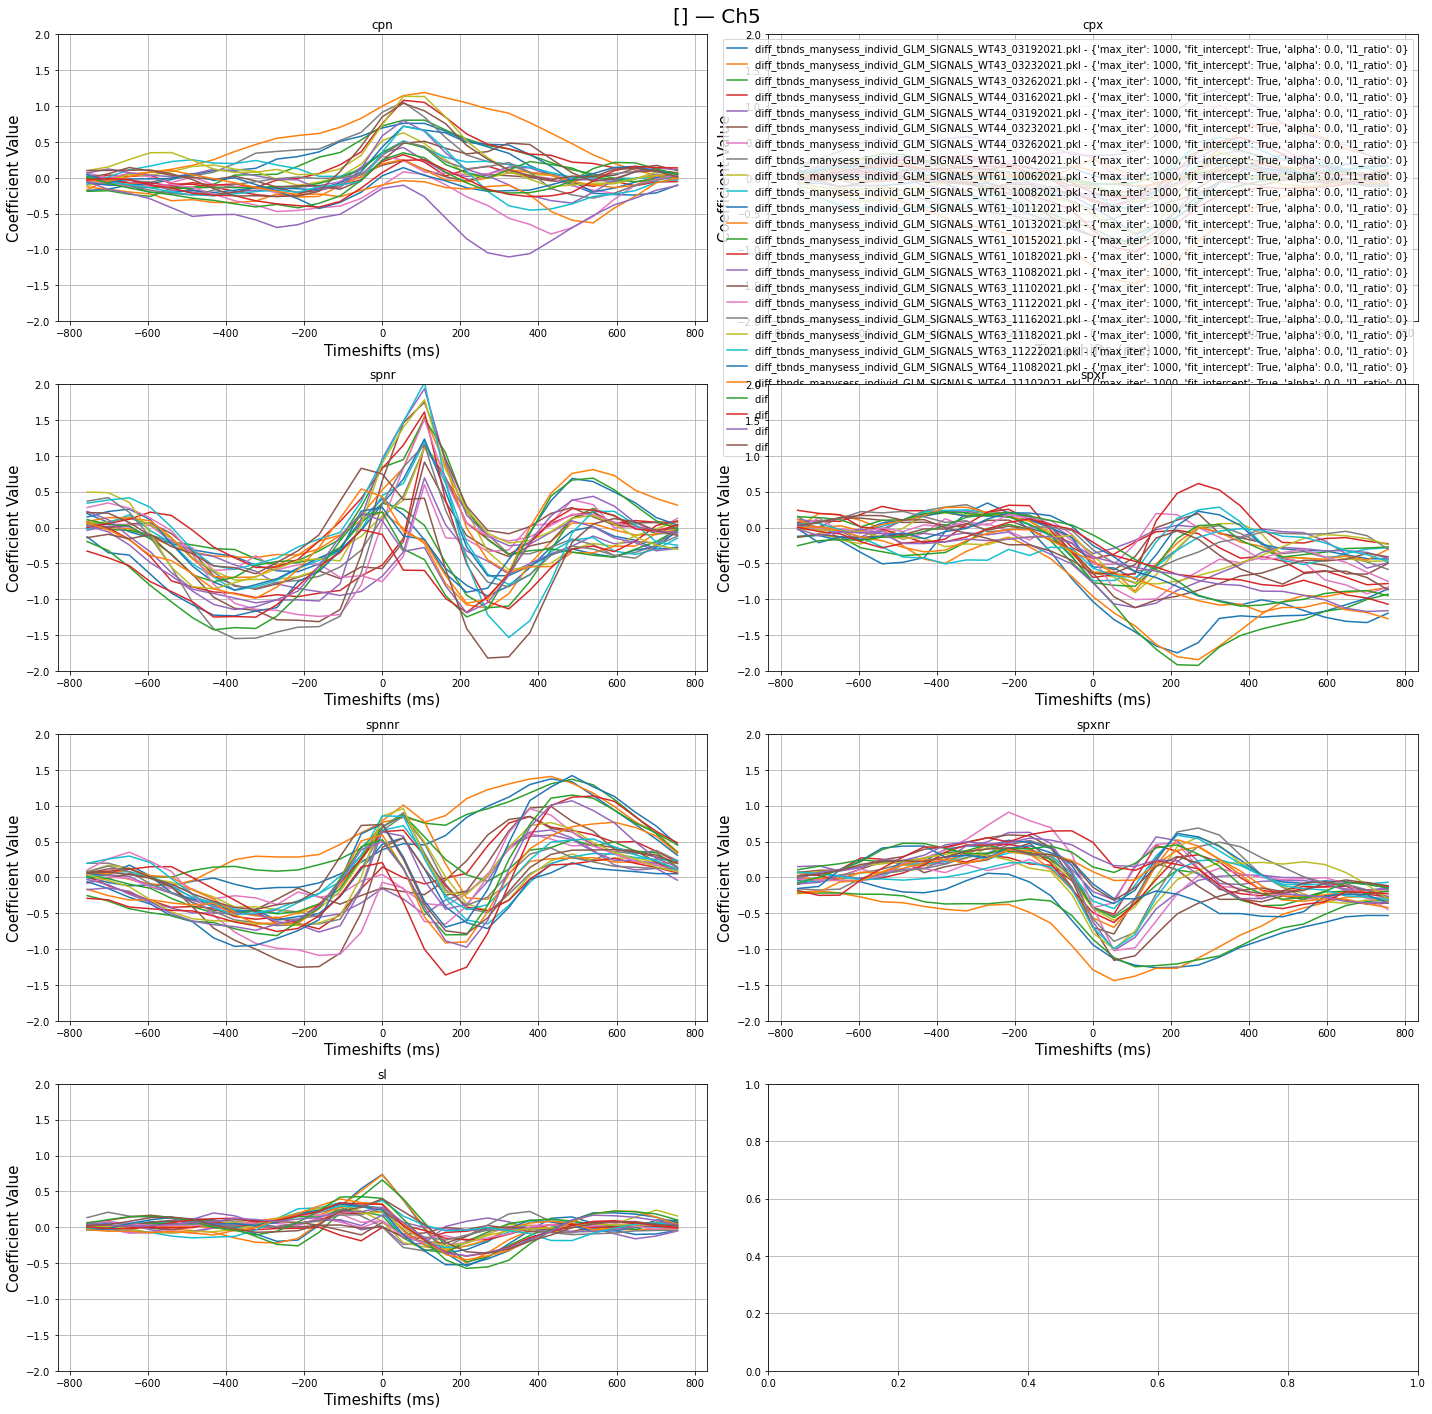

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT43_03232021.pkl - 79 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT43_03262021.pkl - 80 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT44_03162021.pkl - 81 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT44_03192021.pkl - 82 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT44_03232021.pkl - 83 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT44_03262021.pkl - 84 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10042021.pkl - 85 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10062021.pkl - 86 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10082021.pkl - 87 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10112021.pkl - 88 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10132021.pkl - 89 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT61_10152021.pkl - 90 <class 'dict'>
fn: diff_tbnds_m

<ipython-input-13-40e039b59906>:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11102021.pkl - 99 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11122021.pkl - 100 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11162021.pkl - 101 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11182021.pkl - 102 <class 'dict'>
fn: diff_tbnds_manysess_individ_GLM_SIGNALS_WT64_11222021.pkl - 103 <class 'dict'>


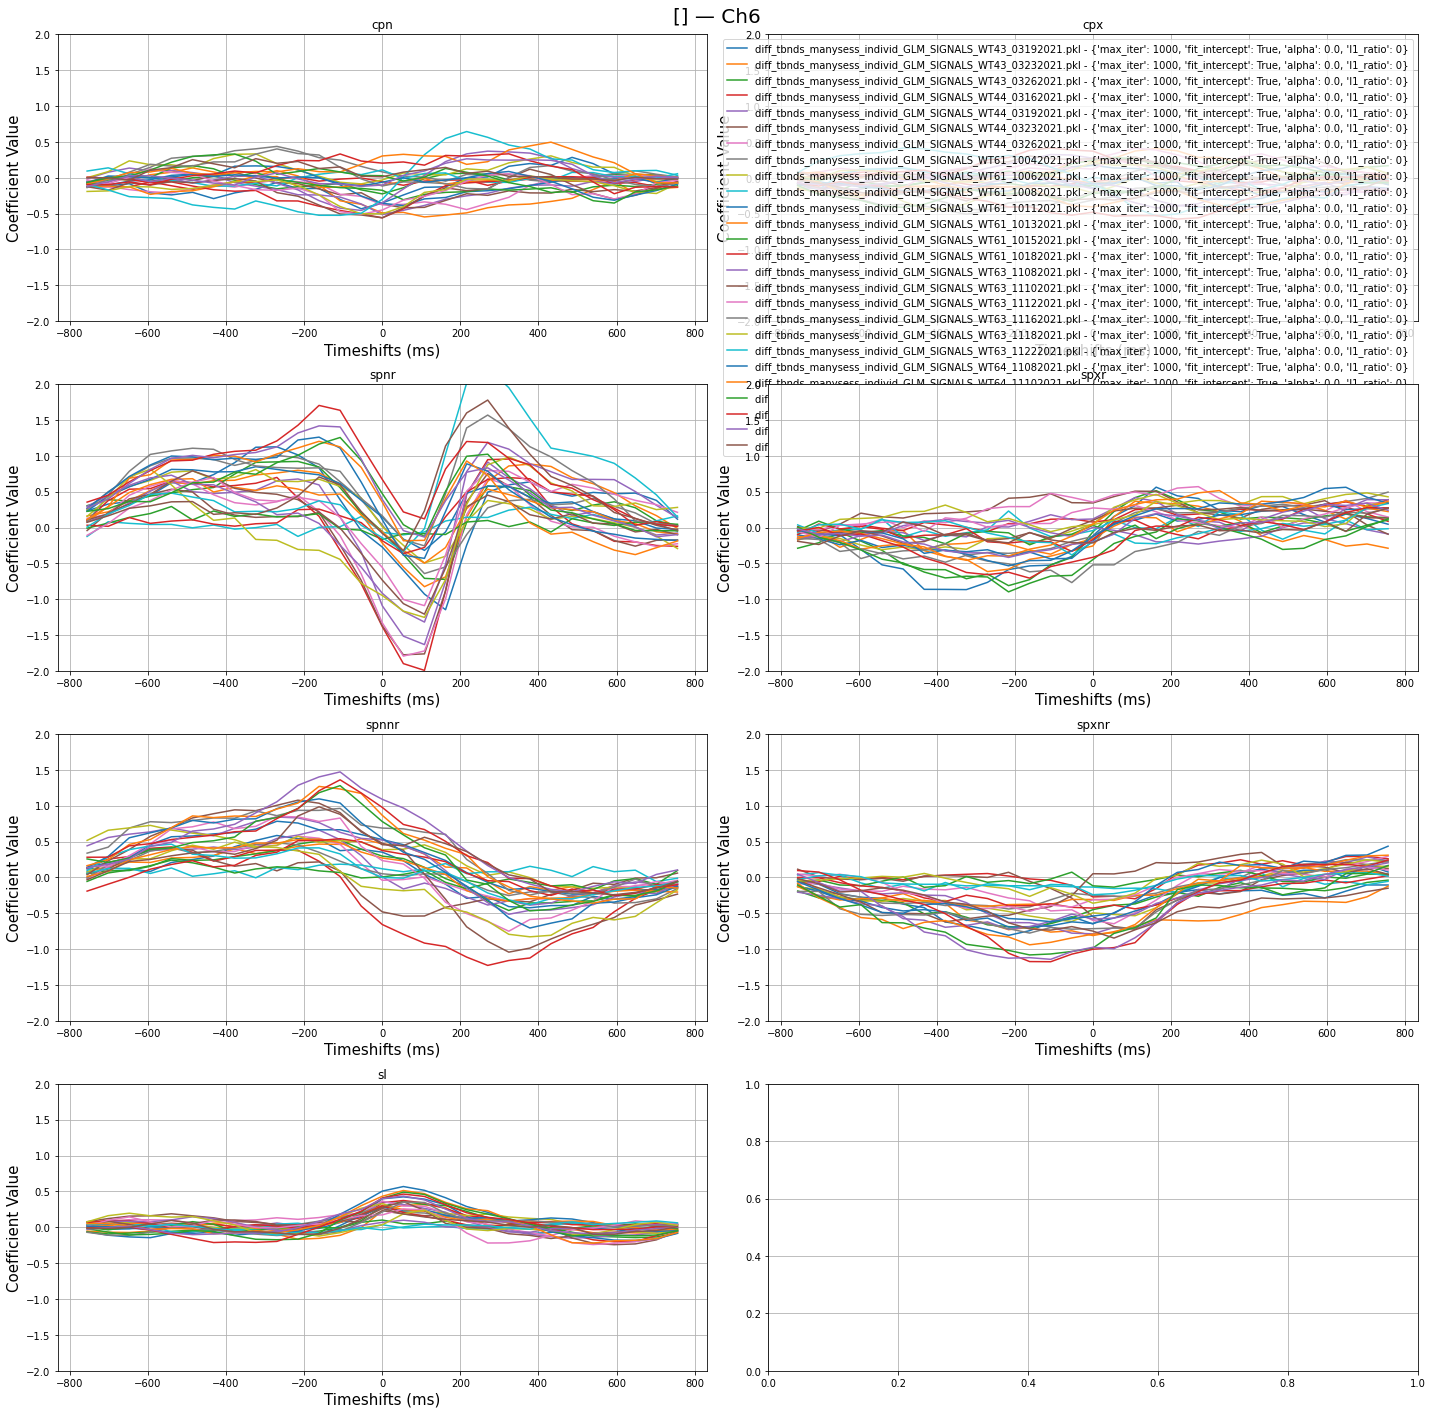

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [13]:

prv_res = None

# for fit_res in fit_res_lst:

    # print(type(fit_res))
for ifr, fr in enumerate(fit_res_lst):
    
    fn = fr[0]
    fr = fr[1]

    if fn in ['manysess_individ-nohyp_GLM_SIGNALS_WT61_10182021.pkl',
              'manysess_individ-nohyp_GLM_SIGNALS_WT63_11222021.pkl',
              'manysess_individ-nohyp_GLM_SIGNALS_WT64_11222021.pkl',
              'manysess_individ-nohyp_GLM_SIGNALS_WT61_10152021.pkl',
              'manysess_individ-nohyp_GLM_SIGNALS_WT61_10082021.pkl',
              ]:
        continue
    
    print('fn:', fn, '-', ifr, type(fr))

    dc = fr['dropped_cols']
    rc = fr['response_col']
    hp = fr['hyperparams']


    if len(dc) > 0 and dc[0] == 'nTrial':
        continue
    if hp['l1_ratio'] > 0.0:
        continue
    # if hp['l1_ratio'] != 0:
    #     continue

    plt.figure()
    glm = fr['glm_model_gss']
    X_cols_plot = gdat.data['X_cols']
    X_cols_plot = [_ for _ in X_cols_plot if _ not in fr['dropped_cols']]
    X_cols_sftd_plot = sglm_ez.add_timeshifts_to_col_list(X_cols_plot, X_cols_plot[1:], neg_order=gdat.data['negorder'], pos_order=gdat.data['posorder'])
    X_cols_plot = [_ for _ in X_cols_plot if _ != 'nTrial']
    X_cols_sftd_plot = [_ for _ in X_cols_sftd_plot if _ != 'nTrial']

    if ifr == 0:
        coef_vals = pd.DataFrame(columns=X_cols_sftd_plot + ['res_col'])
    tmp_coef_vals = pd.DataFrame(glm.coef_[None], columns=X_cols_sftd_plot)
    tmp_coef_vals['res_col'] = rc
    coef_vals = coef_vals.append(tmp_coef_vals)

    bounds = (-2.0, 2.0)

    if prv_res != rc:
        if prv_res is not None:
            axs[0,1].legend()
            for ax in axs.reshape(-1):
                ax.grid(True)
            plt.show()
        
        fig, axs = splt.plot_all_beta_coefs(glm.coef_, X_cols_plot,
                            X_cols_sftd_plot,
                            plot_width=2,
                            # y_lims=(-2.0, 2.0),
                            y_lims=bounds,
                            # filename=f'{fn}_coeffs.png',
                            binsize=54,
                            plot_name=f'{dc} — {rc}',
                            # label='Mean Coefficients'
                            label=f'{fn} - {hp}'
                            )
    else:
        splt.plot_all_beta_coefs(glm.coef_, X_cols_plot,
                            X_cols_sftd_plot,
                            plot_width=2,
                            y_lims=bounds,
                            binsize=54,
                            plot_name=f'{dc} — {rc}',
                            fig=fig,
                            axs=axs,
                            label=f'{fn} - {hp}'
                            )
    prv_res = rc


axs[0,1].legend()
for ax in axs.reshape(-1):
    ax.grid(True)
plt.show()

plt.close('all')


# Try an alpha of 100
# Compare the proportional compression of L1/L2 regularization
# 1. Increase the richness of hte model to fit better
# 2. Start running analyses across all sessions for the animal
# 3. Take regression -- only on all channels

In [14]:
import numpy as np
def sem(series):
    return series.std() / np.sqrt(len(series))

In [15]:
cv_mean = coef_vals.groupby('res_col').apply(np.mean)
cv_sem = coef_vals.groupby('res_col').apply(sem)

cv_upper = cv_mean + cv_sem*1.96
cv_lower = cv_mean - cv_sem*1.96


In [16]:
cv_mean

cpn       cpx      spnr      spxr     spnnr     spxnr        sl  \
res_col                                                                         
Ch1      0.106360 -0.191744  0.075112 -0.260927  0.422095 -0.437665  0.282261   
Ch2     -0.024124 -0.039412  0.020261 -0.011334  0.210570 -0.275332  0.100190   
Ch5      0.386055 -0.294645  0.277799 -0.551181  0.501875 -0.411918  0.253221   
Ch6     -0.204230 -0.021870 -0.276747 -0.068525  0.313490 -0.525745  0.268868   

          cpn_-14   cpx_-14  spnr_-14  ...  spnnr_13  spxnr_13     sl_13  \
res_col                                ...                                 
Ch1     -0.072979 -0.033013  0.171594  ...  0.003248 -0.056634  0.016709   
Ch2     -0.020612 -0.030734  0.069310  ... -0.039027  0.020684  0.005672   
Ch5     -0.027854  0.010795  0.075019  ...  0.326157 -0.229979  0.042315   
Ch6     -0.073555 -0.035988  0.136284  ... -0.154977  0.106691 -0.044029   

           cpn_14    cpx_14   spnr_14   spxr_14  spnnr_14  spxnr_14     sl_14  
res_col                                                                        
Ch1     -0.019325 -0.010174 -0.071920  0.018248 -0.010560 -0.050318  0.024595  
Ch2     -0.017646 -0.053723  0.033795  0.077523 -0.014188  0.025670  0.003740  
Ch5      0.021817  0.014315 -0.041073 -0.649069  0.201021 -0.269489  0.024533  
Ch6     -0.034548 -0.054490 -0.024956  0.202447 -0.085553  0.120304 -0.017098  

[4 rows x 203 columns]

In [17]:
import seaborn as sns

out_col_list = []
for shift_amt in list(range(gdat.data['negorder'], 1))+list(range(1, gdat.data['posorder'] + 1)):
    if shift_amt != 0:
        out_col_list.extend([_ + f'_{shift_amt}' for _ in X_cols_plot])
    else:
        out_col_list.extend([_ for _ in X_cols_plot])

n = [[_*len(X_cols_plot) + __ for _ in range(len(X_cols_sftd_plot)//len(X_cols_plot))] for __ in range(len(X_cols_plot))]
for n_i in range(len(n)):
    for row in range(len(cv_mean)):
        fig = plt.figure()
        # plt.plot(row[1].loc[out_col_list].iloc[n[n_i]])
        # # sns.lineplot(data=coef_vals, x="index", y="signal", hue="event")
        # sns.lineplot(data=coef_vals[coef_vals['res_col'] == 'resp4'].drop('res_col', axis=1).unstack().loc[out_col_list].reset_index().drop(columns='level_1').reset_index().rename({0: '0'}, axis=1),
        #              x="index", y='0')

        if cv_mean.index[row] != 'resp3':
            continue

        plt.plot([_.split('_')[-1] for _ in cv_mean.iloc[row].loc[out_col_list].iloc[n[n_i]].index], cv_mean.iloc[row].loc[out_col_list].iloc[n[n_i]])
        plt.fill_between([_.split('_')[-1] for _ in cv_mean.iloc[row].loc[out_col_list].iloc[n[n_i]].index],
                         cv_lower.iloc[row].loc[out_col_list].iloc[n[n_i]],
                         cv_upper.iloc[row].loc[out_col_list].iloc[n[n_i]],
                         color='b', alpha=.2)
        plt.title(f'{cv_mean.iloc[row].loc[out_col_list].iloc[n[n_i]].index[0][:-4]} — {cv_mean.index[row]}')
        plt.ylim((-2.0, 2.0))
        plt.grid()
        plt.show()
        fig.savefig(f'{cv_mean.iloc[row].loc[out_col_list].iloc[n[n_i]].index[0][:-4]} — {cv_mean.index[row]}.png')
        # plt.title(f'{row[0]} — {}')
    # print(row[1].loc[out_col_list].iloc[n[0]])
    # break
    # plt.plot(row, label=row[0])
    
print(n)

[[0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175, 182, 189, 196], [1, 8, 15, 22, 29, 36, 43, 50, 57, 64, 71, 78, 85, 92, 99, 106, 113, 120, 127, 134, 141, 148, 155, 162, 169, 176, 183, 190, 197], [2, 9, 16, 23, 30, 37, 44, 51, 58, 65, 72, 79, 86, 93, 100, 107, 114, 121, 128, 135, 142, 149, 156, 163, 170, 177, 184, 191, 198], [3, 10, 17, 24, 31, 38, 45, 52, 59, 66, 73, 80, 87, 94, 101, 108, 115, 122, 129, 136, 143, 150, 157, 164, 171, 178, 185, 192, 199], [4, 11, 18, 25, 32, 39, 46, 53, 60, 67, 74, 81, 88, 95, 102, 109, 116, 123, 130, 137, 144, 151, 158, 165, 172, 179, 186, 193, 200], [5, 12, 19, 26, 33, 40, 47, 54, 61, 68, 75, 82, 89, 96, 103, 110, 117, 124, 131, 138, 145, 152, 159, 166, 173, 180, 187, 194, 201], [6, 13, 20, 27, 34, 41, 48, 55, 62, 69, 76, 83, 90, 97, 104, 111, 118, 125, 132, 139, 146, 153, 160, 167, 174, 181, 188, 195, 202]]


<ipython-input-17-b0f0e589894b>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [18]:
# Summary for the mouse
# 1. Chase down the regularization parameters
# Pool data across sessions and explore regularization
# Continue doing session by session and add regularization there
# 
# Conatenate all of the data and fit a simple OLS

# 2. Do the leave out analysis